[View in Colaboratory](https://colab.research.google.com/github/sqlwu/ML/blob/master/diabetes_Regression.ipynb)

In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [52]:
print(diabetes.DESCR)

#特徵
#-年齡(Age)
#-性別(Sex)
#-BMI(Body mass index)
#-血壓 (Average blood pressure) 
#-6次血清檢測(S1~S6)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [0]:
import seaborn as sns

#箱型圖解說 :
#柱狀部分刻度分別為 中位數與上下四分位數 
#線狀部分上下限為 最大值與最小值 
#線狀之外為 離群值

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


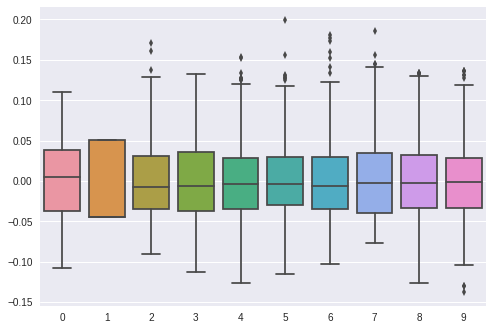

In [54]:
sns.boxplot(data=diabetes.data)

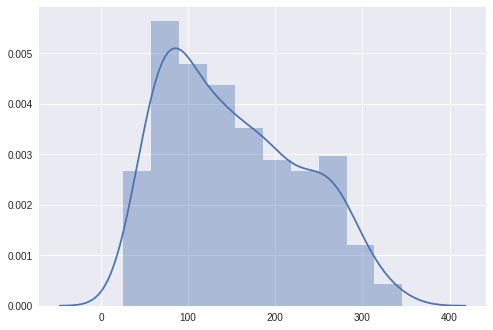

In [55]:
sns.distplot(diabetes.target)

#分佈圖解說 :
#中央淺藍色為區間累計的 直方圖 
#深色曲線為單位 區間密度 的平滑顯示

In [0]:
import pandas as pd

In [0]:
df_data = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)

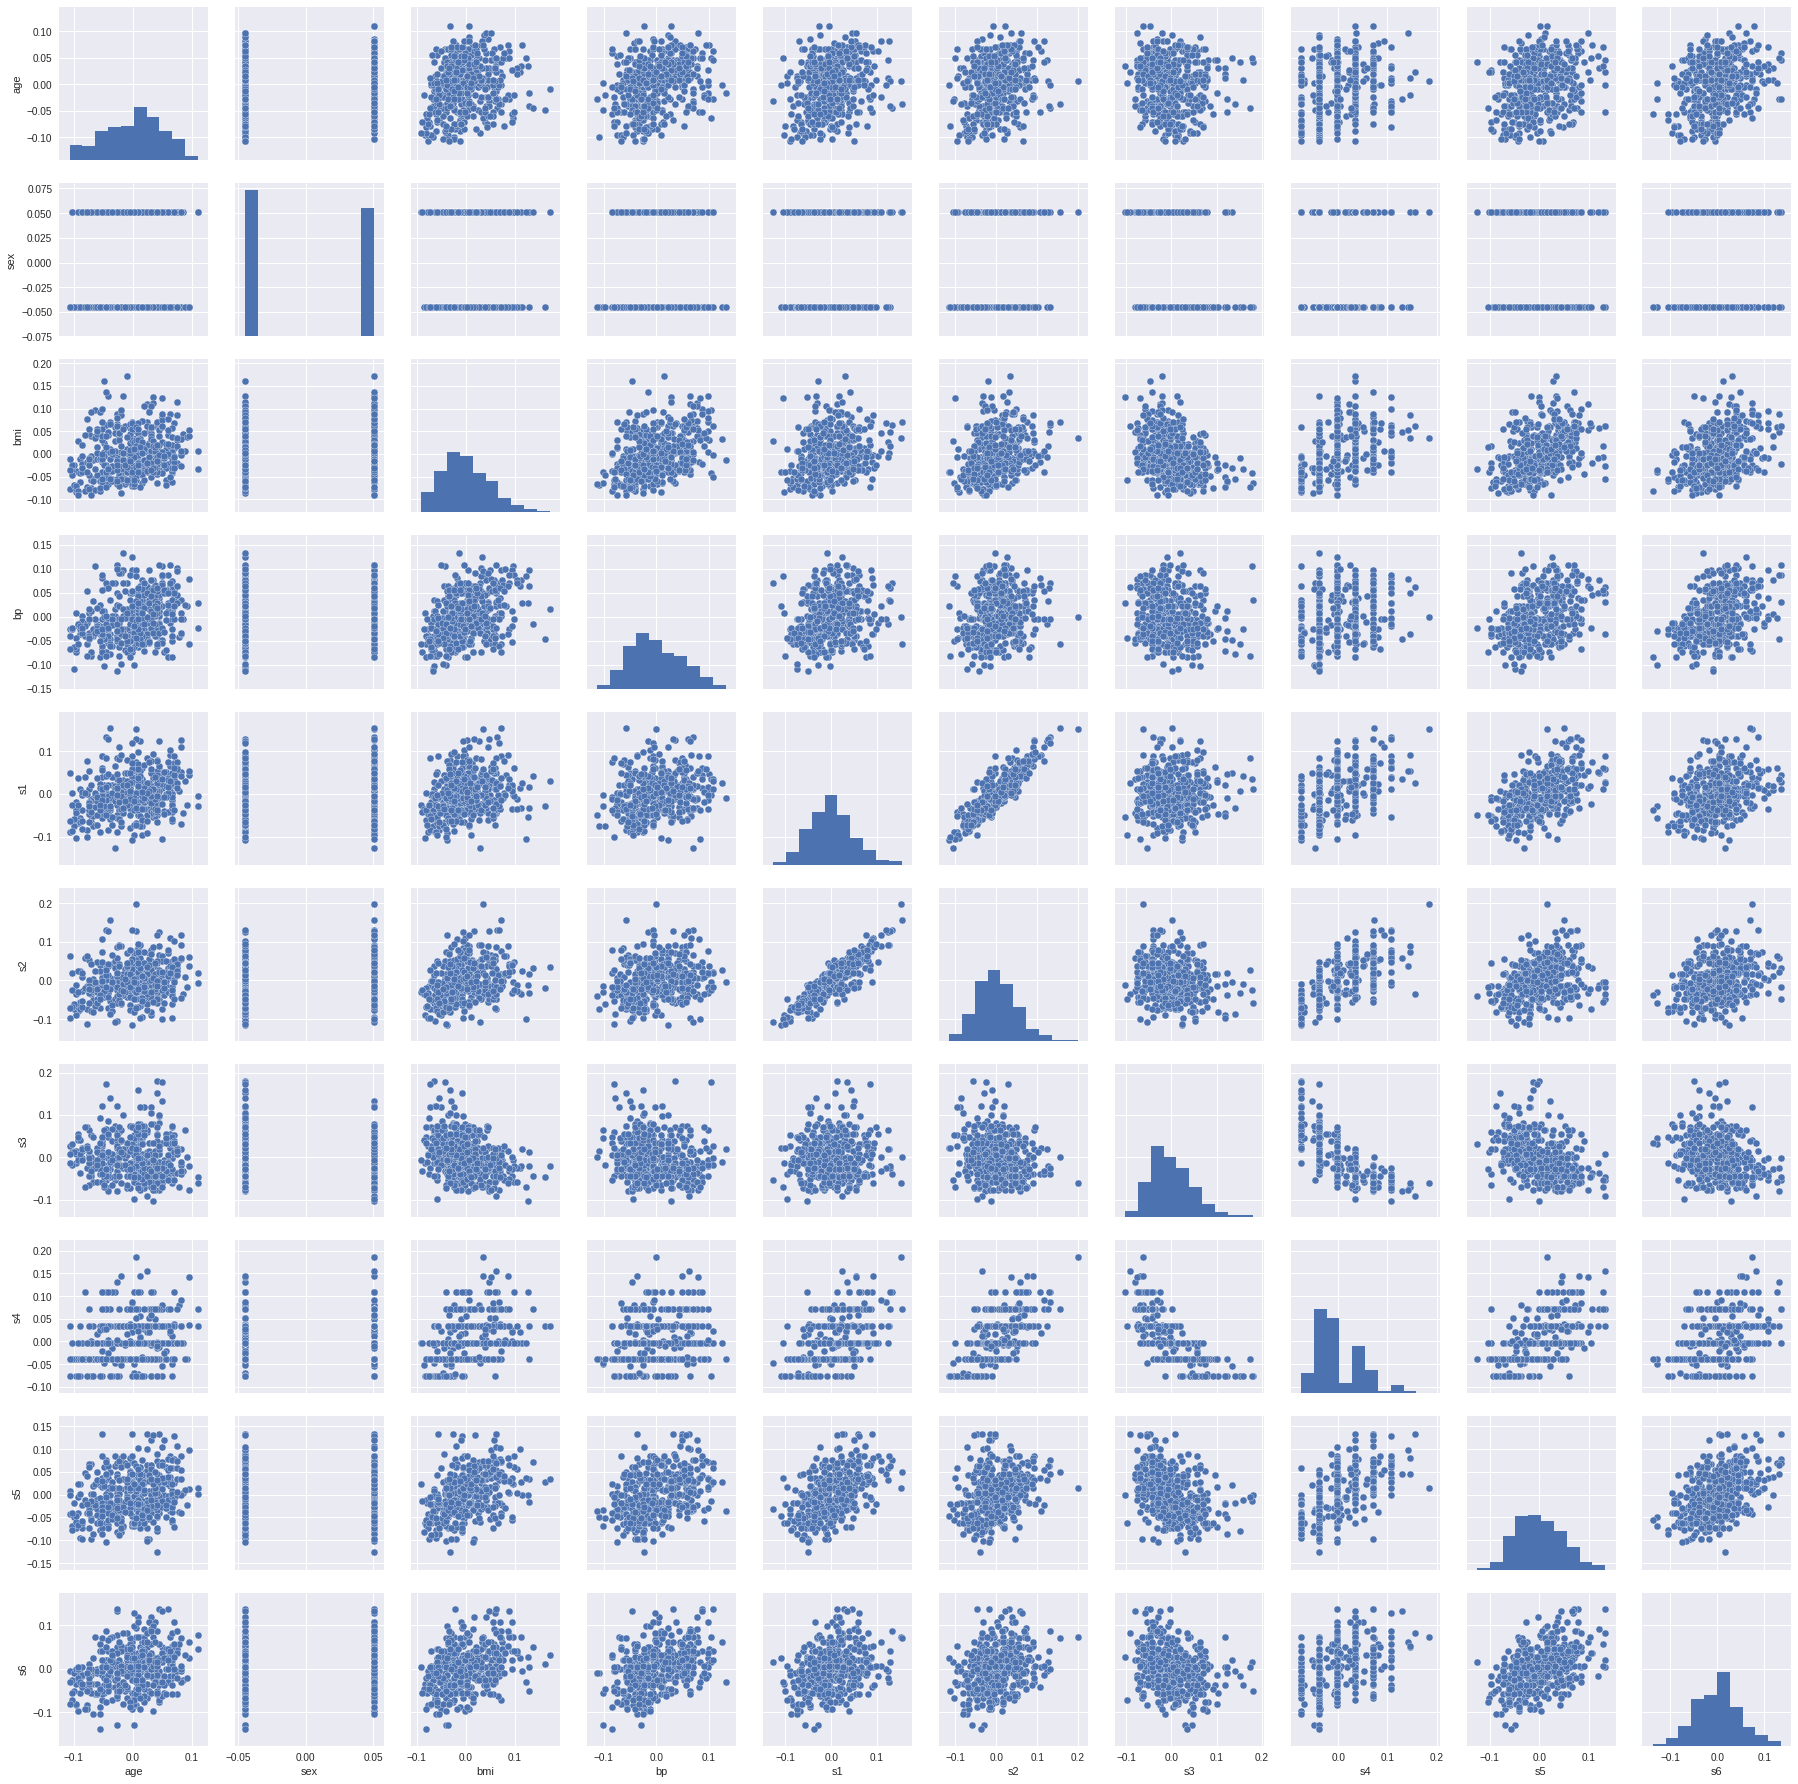

In [58]:
sns.pairplot(df_data)

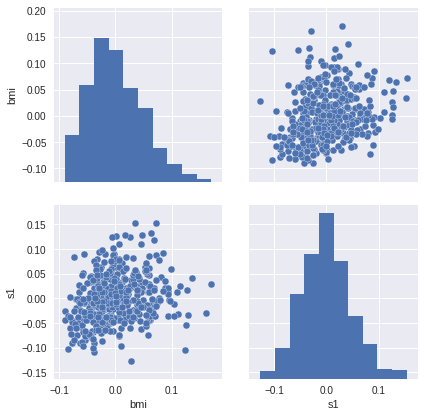

In [59]:
cols = ['bmi', 's1']
sns.pairplot(df_data[cols], size = 3.0) #size 越大圖越大

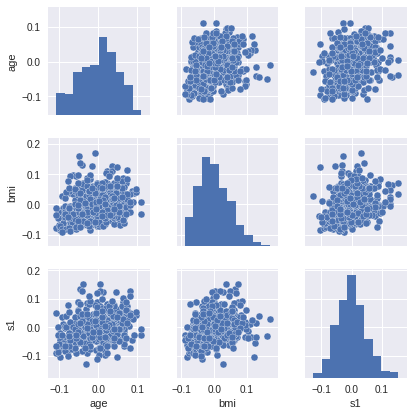

In [60]:
cols = ['age', 'bmi', 's1']
sns.pairplot(df_data[cols], size = 2.0)

In [0]:
corr = df_data.corr()

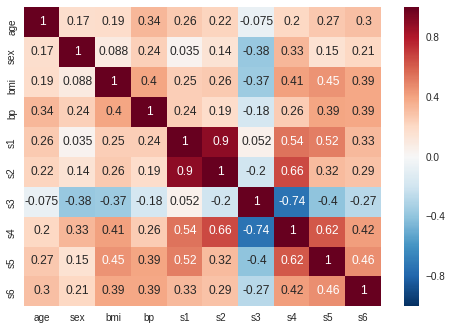

In [62]:
sns.heatmap(corr, annot=True) #annot 表示是否顯示數值

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
print('切割訓練資料與測試資料')

切割訓練資料與測試資料


In [64]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=5)
print('導入決策樹')

導入決策樹


In [65]:
model.fit(X_train, y_train)#訓練參數 與 訓練標籤
pred = model.predict(X_test)
print('模型訓練 與 模型預測')

模型訓練 與 模型預測


In [66]:
from sklearn import metrics
print("MAE:%.2f"% metrics.mean_absolute_error(y_test, pred))#測試答案 預測結果
print("R2:%.2f"% metrics.r2_score(y_test, pred))


MAE:52.95
R2:0.18


In [87]:
from sklearn.linear_model import LinearRegression #選擇模型 線性迴歸
model = LinearRegression()#建立模型
model.fit(X_train,y_train)#訓練模型
y_test_pred = model.predict(X_test)#模型預測
from sklearn import metrics
print('R2 score:%.2f'%metrics.r2_score(y_test, y_test_pred)) #R2 越靠近1越好

R2 score:0.46


In [88]:
dic = {'pred':pred, 'y_test': y_test, 'gap': pred - y_test}
df_pred = pd.DataFrame(dic)
#df_pred = pd.DataFrame([pred, y_test], columns=['pred','y_test']) 
print(df_pred.head())

         gap        pred  y_test
0 -41.693878  203.306122   245.0
1 -28.693878  203.306122   232.0
2 -10.693878  203.306122   214.0
3 -11.238095   76.761905    88.0
4 -63.000000  180.000000   243.0


In [68]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

Selecting previously unselected package fontconfig.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../01-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcdt5 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcgraph6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../04-libtiff5_4.0.8-5ubuntu0.1_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Selecting previously unselected package libwebp6:amd64.
Preparing to unpack .../05-libwebp6_0.6.0-3_amd64.deb ...
Unpa

In [0]:
!pip install -q graphviz
import graphviz

In [0]:
from sklearn import tree
tree_data = tree.export_graphviz(model, out_file=None, feature_names=diabetes.feature_names, class_names=['score'], filled=True, rounded=True, special_characters=True)

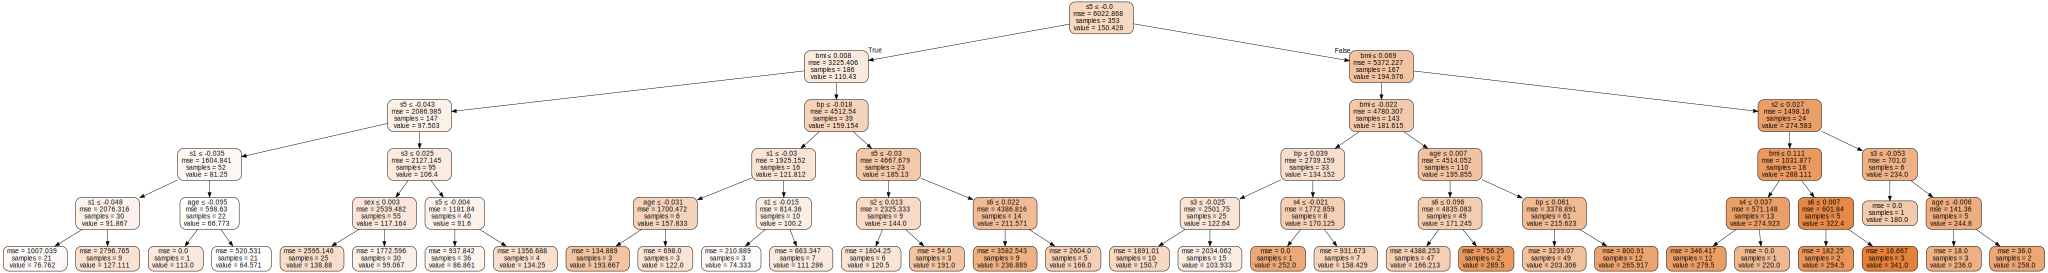

In [84]:
graph = graphviz.Source(tree_data)
graph